In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as sklm 
import sklearn.decomposition as skdc 
import sklearn.pipeline as skpl

pd.set_option('display.max_columns', None) 

In [2]:
filename = 'HEKA_Bldgs_Measured_Consumptions_2015_2016_2017_2018.xlsx'
df = pd.read_excel(filename)
df.sample(5)

,vtj_prt,gml_id,district_heating_MWh_2015,district_heating_MWh_2016,district_heating_MWh_2017,district_heating_MWh_2018,cold_water_m3_2015,cold_water_m3_2016,cold_water_m3_2017,cold_water_m3_2018,electricity_kWh_2015,electricity_kWh_2016,electricity_kWh_2017,electricity_kWh_2018
710,102231512P,BID_e0d9c33a-ed76-4d4b-9960-b8bb1aa3b4b7,65.228,56.841,56.579291,54.949398,563.448,505.735,509.303384,509.797762,5008.986,5055.959,5085.091516,4911.258158
503,101748780P,BID_fe6a85ea-6354-4a0b-b276-3eb8d8ef09fe,74.228,71.025,73.695979,72.198386,750.447,651.144,623.841604,664.390845,6087.269,6294.761,6357.994642,6436.891866
574,101816293J,BID_1dc723ae-c4aa-45c0-8cff-f86aff519ad7,67.930,60.960,61.671486,53.961514,716.652,691.732,688.007014,633.445359,8945.729,8768.785,8357.940815,8043.162952
1527,1022984854,BID_4fe4f099-1a6e-4b27-982e-b8de5d6b72fc,15.168,13.568,13.296212,12.923596,154.936,148.916,147.127732,168.661535,1196.282,1236.131,1228.585198,1214.650602
411,102186095M,BID_ac6b5be7-27e1-492f-bba0-a4def172570a,451.610,419.422,427.316976,391.503577,2570.587,2773.177,2902.023961,2665.242670,32711.949,33303.157,34400.311330,31485.117241


In [3]:
drop_col = ["vtj_prt", "gml_id" ]
for col in drop_col:
    df.drop(col, axis=1, inplace=True)

In [4]:
df.sample(5)

,district_heating_MWh_2015,district_heating_MWh_2016,district_heating_MWh_2017,district_heating_MWh_2018,cold_water_m3_2015,cold_water_m3_2016,cold_water_m3_2017,cold_water_m3_2018,electricity_kWh_2015,electricity_kWh_2016,electricity_kWh_2017,electricity_kWh_2018
285,56.898,56.404,57.033362,55.454466,610.012,623.243,619.212333,619.382926,5036.749,5714.887,5435.311422,5130.702547
1311,117.717,105.670,99.886369,91.937265,1257.826,1340.986,1070.157866,1011.514009,11154.522,11548.252,11669.879849,11735.287177
621,665.027,630.942,605.333785,580.532906,8188.176,8091.344,7546.444129,7691.755013,106164.000,97264.000,93143.000000,101591.000000
33,393.216,362.730,355.622671,356.224180,2705.208,2581.860,2545.474849,2769.898784,42585.093,33933.300,14643.189122,39184.338690
931,843.960,786.548,580.089291,588.781673,5496.648,5564.916,5469.272560,5401.984592,60719.071,65015.321,63839.688611,62306.080565


In [5]:
df.isnull().sum()

district_heating_MWh_2015    0
district_heating_MWh_2016    0
district_heating_MWh_2017    0
district_heating_MWh_2018    0
cold_water_m3_2015           0
cold_water_m3_2016           0
cold_water_m3_2017           0
cold_water_m3_2018           0
electricity_kWh_2015         0
electricity_kWh_2016         0
electricity_kWh_2017         0
electricity_kWh_2018         0
dtype: int64

# So the first file needs no data cleaning

In [6]:
# LOAD THE DATA
import pandas as pd

df = pd.read_excel (r'Helsinki_Buildings_Heating_Energy_Demand_Climate_Change_20201021.xlsx')

In [7]:
df.sample(5)

,vtj_prt,gmlid,SQ_2020_Longitude,SQ_2020_Latitude,SQ_2020_Year_of_construction,SQ_2020_Total_Yearly_Heat_DHW_demand,SQ_2020_January_Heating_Demand,SQ_2020_February_Heating_Demand,SQ_2020_March_Heating_Demand,SQ_2020_April_Heating_Demand,SQ_2020_May_Heating_Demand,SQ_2020_June_Heating_Demand,SQ_2020_July_Heating_Demand,SQ_2020_August_Heating_Demand,SQ_2020_September_Heating_Demand,SQ_2020_October_Heating_Demand,SQ_2020_November_Heating_Demand,SQ_2020_December_Heating_Demand,CC_2025_Total_Yearly_Heat_DHW_demand,CC_2025_January_Heating_Demand,CC_2025_February_Heating_Demand,CC_2025_March_Heating_Demand,CC_2025_April_Heating_Demand,CC_2025_May_Heating_Demand,CC_2025_June_Heating_Demand,CC_2025_July_Heating_Demand,CC_2025_August_Heating_Demand,CC_2025_September_Heating_Demand,CC_2025_October_Heating_Demand,CC_2025_November_Heating_Demand,CC_2025_December_Heating_Demand,CC_2030_Total_Yearly_Heat_DHW_demand,CC_2030_January_Heating_Demand,CC_2030_February_Heating_Demand,CC_2030_March_Heating_Demand,CC_2030_April_Heating_Demand,CC_2030_May_Heating_Demand,CC_2030_June_Heating_Demand,CC_2030_July_Heating_Demand,CC_2030_August_Heating_Demand,CC_2030_September_Heating_Demand,CC_2030_October_Heating_Demand,CC_2030_November_Heating_Demand,CC_2030_December_Heating_Demand,CC_2035_Total_Yearly_Heat_DHW_demand,CC_2035_January_Heating_Demand,CC_2035_February_Heating_Demand,CC_2035_March_Heating_Demand,CC_2035_April_Heating_Demand,CC_2035_May_Heating_Demand,CC_2035_June_Heating_Demand,CC_2035_July_Heating_Demand,CC_2035_August_Heating_Demand,CC_2035_September_Heating_Demand,CC_2035_October_Heating_Demand,CC_2035_November_Heating_Demand,CC_2035_December_Heating_Demand,CC_2040_Total_Yearly_Heat_DHW_demand,CC_2040_January_Heating_Demand,CC_2040_February_Heating_Demand,CC_2040_March_Heating_Demand,CC_2040_April_Heating_Demand,CC_2040_May_Heating_Demand,CC_2040_June_Heating_Demand,CC_2040_July_Heating_Demand,CC_2040_August_Heating_Demand,CC_2040_September_Heating_Demand,CC_2040_October_Heating_Demand,CC_2040_November_Heating_Demand,CC_2040_December_Heating_Demand,CC_2045_Total_Yearly_Heat_DHW_demand,CC_2045_January_Heating_Demand,CC_2045_February_Heating_Demand,CC_2045_March_Heating_Demand,CC_2045_April_Heating_Demand,CC_2045_May_Heating_Demand,CC_2045_June_Heating_Demand,CC_2045_July_Heating_Demand,CC_2045_August_Heating_Demand,CC_2045_September_Heating_Demand,CC_2045_October_Heating_Demand,CC_2045_November_Heating_Demand,CC_2045_December_Heating_Demand,CC_2050_Total_Yearly_Heat_DHW_demand,CC_2050_January_Heating_Demand,CC_2050_February_Heating_Demand,CC_2050_March_Heating_Demand,CC_2050_April_Heating_Demand,CC_2050_May_Heating_Demand,CC_2050_June_Heating_Demand,CC_2050_July_Heating_Demand,CC_2050_August_Heating_Demand,CC_2050_September_Heating_Demand,CC_2050_October_Heating_Demand,CC_2050_November_Heating_Demand,CC_2050_December_Heating_Demand
13613,1032966843,BID_5d969b16-e8b2-43fc-ae8b-80aac61c0bec,24.87189,60.22041,1996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42876,1029151053,BID_0b43f9e2-faca-4d49-9c04-5eff27f99be4,24.91826,60.24078,1951,37315,6272,5474,4927,2078,496,79,0,18,876,2955,4760,5757,36422,6125,5361,4822,1998,450,64,0,12,812,2884,4657,5614,35559,5986,5254,4721,1926,406,51,0,8,753,2806,4550,5476,34933,5884,5156,4650,1877,383,44,0,5,709,2740,4480,5383,34315,5783,5060,4575,1834,356,37,0,3,666,2674,4414,5289,33706,5686,4962,4505,1789,332,32,0,2,624,2605,4348,5200,33096,5584,4871,4427,1742,308,26,0,1,583,2540,4282,5111
20588,102129358D,BID_8ce82b3c-72e8-4933-9a81-15bc38430f6e,25.09553,60.23827,1990,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21618,101758254A,BID_448c6cc2-ee48-4ce8-88b3-22d655da8b14,25.09619,60.23354,1987,17801,2697,2350,2112,869,189,33,1,16,389,1321,

#### We will drop these features as they dont give any meaningful information.
- vtj_prt
- gmlid 

In [8]:
# DROP FEATURES
drop_col = ["vtj_prt", "gmlid" ]
for col in drop_col:
    df.drop(col, axis=1, inplace=True)

In [9]:
df.isnull().sum()

SQ_2020_Longitude                       0
SQ_2020_Latitude                        0
SQ_2020_Year_of_construction            0
SQ_2020_Total_Yearly_Heat_DHW_demand    0
SQ_2020_January_Heating_Demand          0
                                       ..
CC_2050_August_Heating_Demand           0
CC_2050_September_Heating_Demand        0
CC_2050_October_Heating_Demand          0
CC_2050_November_Heating_Demand         0
CC_2050_December_Heating_Demand         0
Length: 94, dtype: int64

No data cleaning is needed or so it seems. After going through the dataset, we found <b> "not calculated"</b> in many rows. So we have to clean that up. </b>

Cleaning "not calculated" cells

In [10]:
# REPLACE NOT CALCULATED
df = df.replace("non calculated",np.nan)
print(df.shape)
df.isnull().sum()

(46641, 94)


SQ_2020_Longitude                         0
SQ_2020_Latitude                          0
SQ_2020_Year_of_construction              0
SQ_2020_Total_Yearly_Heat_DHW_demand      0
SQ_2020_January_Heating_Demand          698
                                       ... 
CC_2050_August_Heating_Demand           698
CC_2050_September_Heating_Demand        698
CC_2050_October_Heating_Demand          698
CC_2050_November_Heating_Demand         698
CC_2050_December_Heating_Demand         698
Length: 94, dtype: int64

<AxesSubplot:>

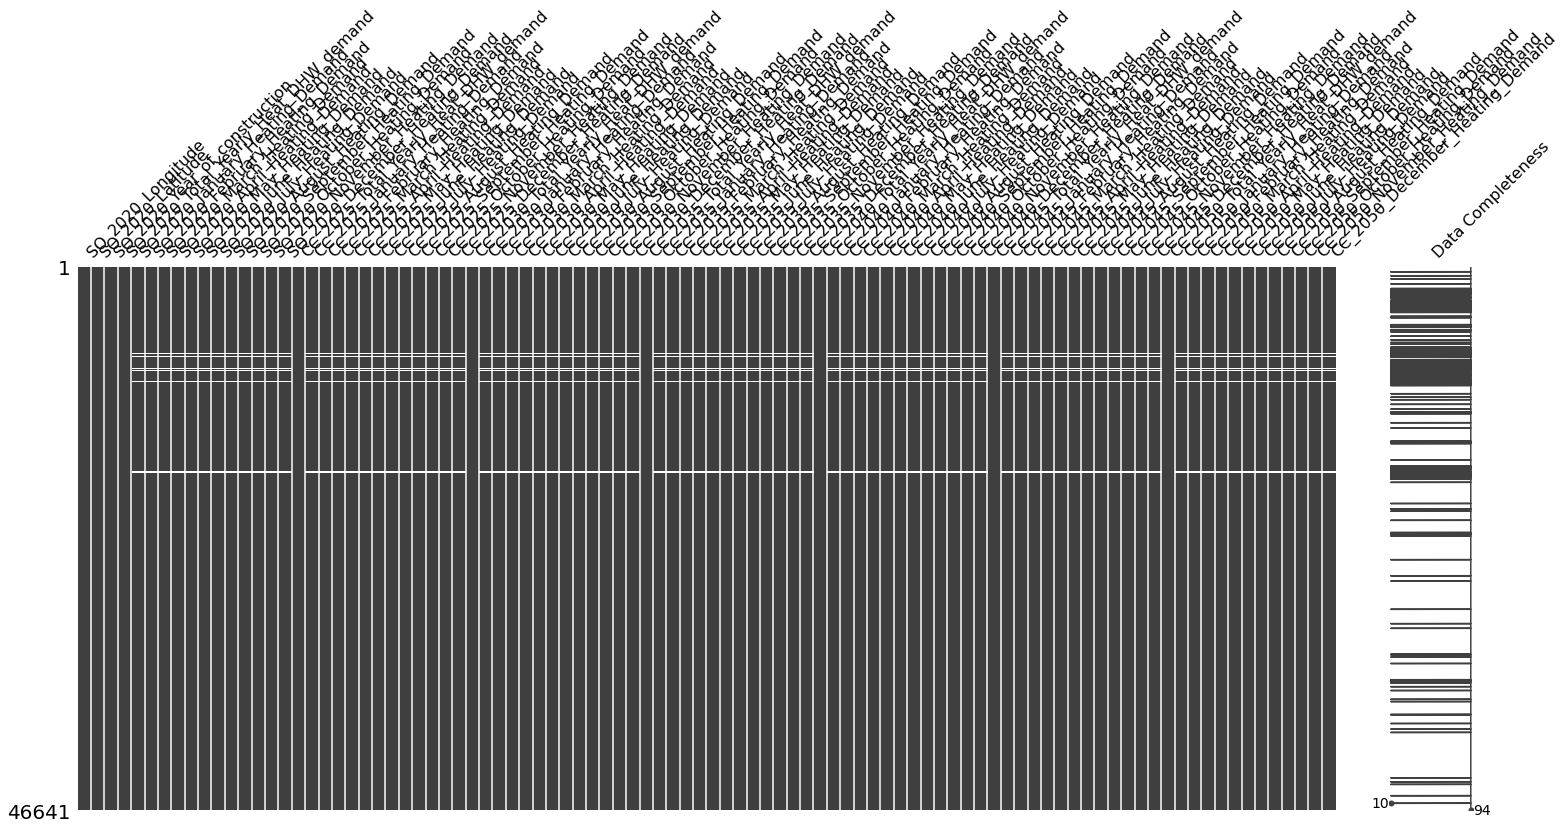

In [11]:
import missingno as msno
%matplotlib inline

msno.matrix(df, labels=True)

##### As we can see in the visualization, missing values are common to same rows. So we will just drop them, as our dataset is huge compared to missing value row count.<br>
46641 > 698

In [12]:
# DROP NA
df.dropna(inplace=True)
df.isnull().sum().sum()

0

### EDA

In [13]:
df.sample(5)

,SQ_2020_Longitude,SQ_2020_Latitude,SQ_2020_Year_of_construction,SQ_2020_Total_Yearly_Heat_DHW_demand,SQ_2020_January_Heating_Demand,SQ_2020_February_Heating_Demand,SQ_2020_March_Heating_Demand,SQ_2020_April_Heating_Demand,SQ_2020_May_Heating_Demand,SQ_2020_June_Heating_Demand,SQ_2020_July_Heating_Demand,SQ_2020_August_Heating_Demand,SQ_2020_September_Heating_Demand,SQ_2020_October_Heating_Demand,SQ_2020_November_Heating_Demand,SQ_2020_December_Heating_Demand,CC_2025_Total_Yearly_Heat_DHW_demand,CC_2025_January_Heating_Demand,CC_2025_February_Heating_Demand,CC_2025_March_Heating_Demand,CC_2025_April_Heating_Demand,CC_2025_May_Heating_Demand,CC_2025_June_Heating_Demand,CC_2025_July_Heating_Demand,CC_2025_August_Heating_Demand,CC_2025_September_Heating_Demand,CC_2025_October_Heating_Demand,CC_2025_November_Heating_Demand,CC_2025_December_Heating_Demand,CC_2030_Total_Yearly_Heat_DHW_demand,CC_2030_January_Heating_Demand,CC_2030_February_Heating_Demand,CC_2030_March_Heating_Demand,CC_2030_April_Heating_Demand,CC_2030_May_Heating_Demand,CC_2030_June_Heating_Demand,CC_2030_July_Heating_Demand,CC_2030_August_Heating_Demand,CC_2030_September_Heating_Demand,CC_2030_October_Heating_Demand,CC_2030_November_Heating_Demand,CC_2030_December_Heating_Demand,CC_2035_Total_Yearly_Heat_DHW_demand,CC_2035_January_Heating_Demand,CC_2035_February_Heating_Demand,CC_2035_March_Heating_Demand,CC_2035_April_Heating_Demand,CC_2035_May_Heating_Demand,CC_2035_June_Heating_Demand,CC_2035_July_Heating_Demand,CC_2035_August_Heating_Demand,CC_2035_September_Heating_Demand,CC_2035_October_Heating_Demand,CC_2035_November_Heating_Demand,CC_2035_December_Heating_Demand,CC_2040_Total_Yearly_Heat_DHW_demand,CC_2040_January_Heating_Demand,CC_2040_February_Heating_Demand,CC_2040_March_Heating_Demand,CC_2040_April_Heating_Demand,CC_2040_May_Heating_Demand,CC_2040_June_Heating_Demand,CC_2040_July_Heating_Demand,CC_2040_August_Heating_Demand,CC_2040_September_Heating_Demand,CC_2040_October_Heating_Demand,CC_2040_November_Heating_Demand,CC_2040_December_Heating_Demand,CC_2045_Total_Yearly_Heat_DHW_demand,CC_2045_January_Heating_Demand,CC_2045_February_Heating_Demand,CC_2045_March_Heating_Demand,CC_2045_April_Heating_Demand,CC_2045_May_Heating_Demand,CC_2045_June_Heating_Demand,CC_2045_July_Heating_Demand,CC_2045_August_Heating_Demand,CC_2045_September_Heating_Demand,CC_2045_October_Heating_Demand,CC_2045_November_Heating_Demand,CC_2045_December_Heating_Demand,CC_2050_Total_Yearly_Heat_DHW_demand,CC_2050_January_Heating_Demand,CC_2050_February_Heating_Demand,CC_2050_March_Heating_Demand,CC_2050_April_Heating_Demand,CC_2050_May_Heating_Demand,CC_2050_June_Heating_Demand,CC_2050_July_Heating_Demand,CC_2050_August_Heating_Demand,CC_2050_September_Heating_Demand,CC_2050_October_Heating_Demand,CC_2050_November_Heating_Demand,CC_2050_December_Heating_Demand
28989,25.04799,60.27407,1986,43461,6613,5650,4875,1686,261,36,1,17,674,3092,5047,6089,42617,6470,5537,4774,1620,232,30,1,14,619,3014,4937,5951,41783,6324,5434,4669,1550,206,24,1,11,561,2942,4834,5810,41189,6227,5335,4603,1506,191,21,0,9,527,2874,4763,5714,40602,6123,5241,4532,1464,177,19,0,7,493,2807,4695,5626,40003,6019,5143,4459,1418,163,16,0,6,458,2740,4630,5531,39428,5927,5049,4396,1380,151,14,0,4,427,2667,4560,5436
36220,25.12506,60.19859,2005,20251,3440,2891,2400,756,123,19,1,7,296,1536,2600,3161,19821,3360,2834,2344,723,110,16,0,6,271,1498,2549,3087,19399,3288,2776,2293,692,98,13,0,4,248,1460,2491,3014,19095,3233,2727,2261,672,91,11,0,3,231,1425,2453,2964,18791,3178,2679,2222,652,85,10,0,3,215,1389,2419,2917,18496,3131,2627,2189,631,79,8,0,2,201,1354,2385,2866,18203,3076,2578,2156,614,73,7,0,1,187,1319,2347,2820
11983,24.95970,60.22651,2004,36501,5464,4670,4023,1339,182,23,1,11,534,2548,4169,5032,35808,5344,4581,3936,1287,161,19,1,9,489,2488,4078,4912,35130,5225,4495,3853,1228,143,15,0,7,444,2428,3988,4800,34634,5139,4413,3793,1193,132,13,0,5,413,2372,3934,4721,34137,5053,4331,3735,1155,121,11,0,4,384,2316,3879,4643,3

#### Feature Overview to find our target feature.
- DHW = Domestic hot water for all monthes in 2020 (12+1 features)
- 2020, 2025, 2030, 2035, 2040, 2045, 2050 = 7*13 = 91
- longitutde, latitude, year = 3
- dropped unambiguous features = 2<br>
So total = 96

In [14]:
df["SQ_2020_Longitude"].value_counts().sum()

45943

So all data has different logitude, so each row correspondents to individual building.<br>
From google map, we saw that, buildings that are in same area, should have same three digits.<br>
23.450023, 61.23245<br>
23.423441, 61.24412<br>
They are in the same area.<br>
##### So we can assign area to each building and see which area has higher energy consumption over the years.

Similarly, <b>"Year of production"</b> is also an interesting feature. 
#### We can use it to compare old building, moderately new buildings and new buldings' energy consumption.

We also notice years. We can use year 2020 and find out season where there were more energy consumptions. Then we can check if it remains consistent around all the years. A decrease in heat consumption indicated global warming.
- Define some seasons A. B. C
- Notice energy consumption in those seasons and make a table like <br>
     A B C<br>
2020 <br>
2025<br>
2030<br>
We can do a Chi-square test to see if the temperatures remain same in all seasons on these years.
#### Seasons and Global warming from the energy consumption

### Determining Target Feature

For now, we will work with "year of production" Vs "Energy consumption"

In [15]:
years = df["SQ_2020_Year_of_construction"].value_counts().index.tolist()
years = set(years)
print(years)

{1724, 1759, 1764, 1769, 1779, 1789, 1792, 1799, 1803, 1809, 1813, 1814, 1816, 1817, 1819, 1824, 1825, 1826, 1827, 1829, 1830, 1831, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1846, 1847, 1848, 1849, 1850, 1851, 1853, 1854, 1857, 1859, 1860, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 198

So we have years from (1724 to 2020). <br>
We will mark
- (1701-1800): Historical Monuments - 0
- (1801-1900): Colonist Period Buildings - 1
- (1901-1950): World War Era Buildings - 2
- (1951-1990): Industrial Age Buildings - 3
- (1991-2005): Modern Buildings - 4
- (2006-2015): Recent Buildings - 5
- (2016-2020): New Buildings - 6

In [16]:
building_genre = []
for year in df["SQ_2020_Year_of_construction"]:
    if year>2016: building_genre.append(6)
    elif year>2006 : building_genre.append(5)
    elif year>1991 : building_genre.append(4)
    elif year>1951 : building_genre.append(3)
    elif year>1901 : building_genre.append(2)
    elif year>1801 : building_genre.append(1)
    elif year>1701 : building_genre.append(0)
    else: building_genre.append(np.nan)
df["building_genre"]=building_genre
df.sample(5)

,SQ_2020_Longitude,SQ_2020_Latitude,SQ_2020_Year_of_construction,SQ_2020_Total_Yearly_Heat_DHW_demand,SQ_2020_January_Heating_Demand,SQ_2020_February_Heating_Demand,SQ_2020_March_Heating_Demand,SQ_2020_April_Heating_Demand,SQ_2020_May_Heating_Demand,SQ_2020_June_Heating_Demand,SQ_2020_July_Heating_Demand,SQ_2020_August_Heating_Demand,SQ_2020_September_Heating_Demand,SQ_2020_October_Heating_Demand,SQ_2020_November_Heating_Demand,SQ_2020_December_Heating_Demand,CC_2025_Total_Yearly_Heat_DHW_demand,CC_2025_January_Heating_Demand,CC_2025_February_Heating_Demand,CC_2025_March_Heating_Demand,CC_2025_April_Heating_Demand,CC_2025_May_Heating_Demand,CC_2025_June_Heating_Demand,CC_2025_July_Heating_Demand,CC_2025_August_Heating_Demand,CC_2025_September_Heating_Demand,CC_2025_October_Heating_Demand,CC_2025_November_Heating_Demand,CC_2025_December_Heating_Demand,CC_2030_Total_Yearly_Heat_DHW_demand,CC_2030_January_Heating_Demand,CC_2030_February_Heating_Demand,CC_2030_March_Heating_Demand,CC_2030_April_Heating_Demand,CC_2030_May_Heating_Demand,CC_2030_June_Heating_Demand,CC_2030_July_Heating_Demand,CC_2030_August_Heating_Demand,CC_2030_September_Heating_Demand,CC_2030_October_Heating_Demand,CC_2030_November_Heating_Demand,CC_2030_December_Heating_Demand,CC_2035_Total_Yearly_Heat_DHW_demand,CC_2035_January_Heating_Demand,CC_2035_February_Heating_Demand,CC_2035_March_Heating_Demand,CC_2035_April_Heating_Demand,CC_2035_May_Heating_Demand,CC_2035_June_Heating_Demand,CC_2035_July_Heating_Demand,CC_2035_August_Heating_Demand,CC_2035_September_Heating_Demand,CC_2035_October_Heating_Demand,CC_2035_November_Heating_Demand,CC_2035_December_Heating_Demand,CC_2040_Total_Yearly_Heat_DHW_demand,CC_2040_January_Heating_Demand,CC_2040_February_Heating_Demand,CC_2040_March_Heating_Demand,CC_2040_April_Heating_Demand,CC_2040_May_Heating_Demand,CC_2040_June_Heating_Demand,CC_2040_July_Heating_Demand,CC_2040_August_Heating_Demand,CC_2040_September_Heating_Demand,CC_2040_October_Heating_Demand,CC_2040_November_Heating_Demand,CC_2040_December_Heating_Demand,CC_2045_Total_Yearly_Heat_DHW_demand,CC_2045_January_Heating_Demand,CC_2045_February_Heating_Demand,CC_2045_March_Heating_Demand,CC_2045_April_Heating_Demand,CC_2045_May_Heating_Demand,CC_2045_June_Heating_Demand,CC_2045_July_Heating_Demand,CC_2045_August_Heating_Demand,CC_2045_September_Heating_Demand,CC_2045_October_Heating_Demand,CC_2045_November_Heating_Demand,CC_2045_December_Heating_Demand,CC_2050_Total_Yearly_Heat_DHW_demand,CC_2050_January_Heating_Demand,CC_2050_February_Heating_Demand,CC_2050_March_Heating_Demand,CC_2050_April_Heating_Demand,CC_2050_May_Heating_Demand,CC_2050_June_Heating_Demand,CC_2050_July_Heating_Demand,CC_2050_August_Heating_Demand,CC_2050_September_Heating_Demand,CC_2050_October_Heating_Demand,CC_2050_November_Heating_Demand,CC_2050_December_Heating_Demand,building_genre
12405,24.87999,60.21689,1960,288036,32752,28124,21889,3492,100,2,0,0,297,6755,20720,28346,282139,31506,27160,21069,3185,80,1,0,0,243,6324,19836,27177,276246,30291,26223,20189,2875,63,1,0,0,199,5881,18984,25981,272107,29429,25428,19615,2708,54,1,0,0,170,5501,18411,25231,268013,28604,24626,19013,2532,46,0,0,0,144,5132,17870,24487,263937,27775,23822,18437,2366,39,0,0,0,121,4778,17331,23709,259855,26919,23030,17870,2220,33,0,0,0,102,4423,16768,22932,3
605,24.89649,60.25686,1991,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
673,24.87987,60.23622,1980,33522,5225,4547,4096,1744,423,79,3,36,778,2547,4006,4809,32812,5108,4456,4016,1687,386,66,2,28,725,2490,3921,4699,32103,4994,4368,3929,1624,350,56,1,22,676,2430,3839,4586,31608,4913,4293,3873,1588,330,49,1,18,641,2378,3783,4513,31114,4834,4217,3814,1548,310,44,1,14,605,2325,3730,4444,30624,4756,4142,3757,1510,290,38,0,11,571,2272,3677,4369,30134,4675,4067,3701,1476,270,34,0,9,539,2217,3622,4295,3
35656,25.05064,60.22507,2007,30605,43

### EDA

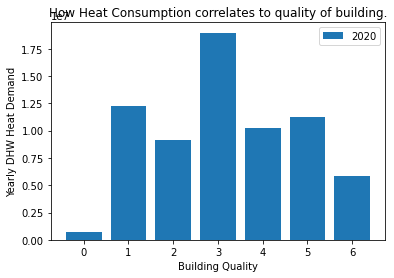

In [17]:
x = df["building_genre"]
y1 = df["SQ_2020_Total_Yearly_Heat_DHW_demand"]

plt.bar(x, y1, label="2020")
plt.xlabel("Building Quality")
plt.ylabel("Yearly DHW Heat Demand")
plt.title("How Heat Consumption correlates to quality of building.")
plt.legend()
plt.show()

In [18]:
x = df["building_genre"].copy()
y1 = df["SQ_2020_Total_Yearly_Heat_DHW_demand"].copy()
y2 = df["CC_2025_Total_Yearly_Heat_DHW_demand"].copy()
y3 = df["CC_2025_Total_Yearly_Heat_DHW_demand"].copy()
y4 = df["CC_2025_Total_Yearly_Heat_DHW_demand"].copy()
y2 = df["CC_2025_Total_Yearly_Heat_DHW_demand"].copy()
y2 = df["CC_2025_Total_Yearly_Heat_DHW_demand"].copy()

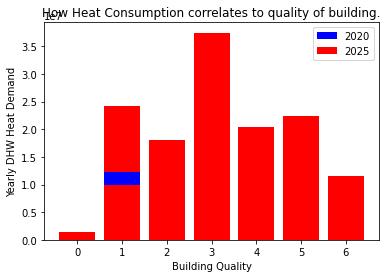

In [19]:
plt.bar(x, y1, label="2020", color="b")
plt.bar(x, y2, label="2025", bottom=y1, color="red")
plt.xlabel("Building Quality")
plt.ylabel("Yearly DHW Heat Demand")
plt.title("How Heat Consumption correlates to quality of building.")
plt.legend()
plt.show()

<BarContainer object of 45943 artists>

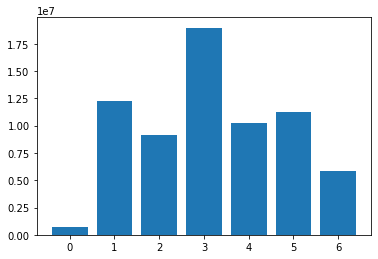

In [20]:
plt.bar(x, y1)

In [ ]:
fig = plt.figure()
    
ax1 = plt.subplot2grid((3,3),(0,0))
plt.bar(x, y1, label="2020")
ax2 = plt.subplot2grid((3,3),(0,1))
plt.bar(x, y2, label="2025")
ax3 = plt.subplot2grid((3,3),(0,2))
plt.bar(x, y3, label="2030")
ax4 = plt.subplot2grid((3,3),(2,0))
plt.bar(x, y4, label="2035")
ax5 = plt.subplot2grid((3,3),(1,1))
plt.bar(x, y5, label="2040")
ax6 = plt.subplot2grid((3,3),(1,2))
plt.bar(x, y6, label="2045")

plt.legend()
plt.show()

In [ ]:
x = df["building_genre"]
y1 = df["SQ_2020_Total_Yearly_Heat_DHW_demand"]
y2 = df["CC_2025_Total_Yearly_Heat_DHW_demand"]
y3 = df["CC_2030_Total_Yearly_Heat_DHW_demand"]

plt.bar(x, y1, label="2020")
plt.bar(x, y2, label="2025")
plt.bar(x, y3, label="2030")

plt.xlabel("Building Quality")
plt.ylabel("Yearly DHW Heat Demand")
plt.title("How Heat Consumption correlates to quality of building.")
plt.legend()
plt.show()

### Identifying Categorical Featurers

In [21]:
def get_all_categorical_feature(database):
    categorical_features = []
    for feature in database.columns:
        if len(database[feature].value_counts())<20:
            categorical_features.append(feature)
    return categorical_features

In [22]:
categorical_features = get_all_categorical_feature(df)
categorical_features

['building_genre']

In [23]:
set(df.dtypes)

{dtype('int64'), dtype('float64'), dtype('O')}

### Converting object to integer

In [24]:
object_features = list(df.select_dtypes(include=['object']).columns)
object_features

['SQ_2020_January_Heating_Demand',
 'SQ_2020_February_Heating_Demand',
 'SQ_2020_March_Heating_Demand',
 'SQ_2020_April_Heating_Demand',
 'SQ_2020_May_Heating_Demand',
 'SQ_2020_June_Heating_Demand',
 'SQ_2020_July_Heating_Demand',
 'SQ_2020_August_Heating_Demand',
 'SQ_2020_September_Heating_Demand',
 'SQ_2020_October_Heating_Demand',
 'SQ_2020_November_Heating_Demand',
 'SQ_2020_December_Heating_Demand',
 'CC_2025_January_Heating_Demand',
 'CC_2025_February_Heating_Demand',
 'CC_2025_March_Heating_Demand',
 'CC_2025_April_Heating_Demand',
 'CC_2025_May_Heating_Demand',
 'CC_2025_June_Heating_Demand',
 'CC_2025_July_Heating_Demand',
 'CC_2025_August_Heating_Demand',
 'CC_2025_September_Heating_Demand',
 'CC_2025_October_Heating_Demand',
 'CC_2025_November_Heating_Demand',
 'CC_2025_December_Heating_Demand',
 'CC_2030_January_Heating_Demand',
 'CC_2030_February_Heating_Demand',
 'CC_2030_March_Heating_Demand',
 'CC_2030_April_Heating_Demand',
 'CC_2030_May_Heating_Demand',
 'CC_2030_Ju

In [25]:
df["CC_2040_March_Heating_Demand"].astype(str).astype(int)

0            0
1         5369
2        21197
3         3728
4        21351
         ...  
46636     3933
46637        0
46638    29599
46639        0
46640     1666
Name: CC_2040_March_Heating_Demand, Length: 45943, dtype: int64

In [26]:
for feature in object_features:
    print("\""+feature +"\" has been converted from object to int.")
    df[feature].astype(str).astype(int)

"SQ_2020_January_Heating_Demand" has been converted from object to int.
"SQ_2020_February_Heating_Demand" has been converted from object to int.
"SQ_2020_March_Heating_Demand" has been converted from object to int.
"SQ_2020_April_Heating_Demand" has been converted from object to int.
"SQ_2020_May_Heating_Demand" has been converted from object to int.
"SQ_2020_June_Heating_Demand" has been converted from object to int.
"SQ_2020_July_Heating_Demand" has been converted from object to int.
"SQ_2020_August_Heating_Demand" has been converted from object to int.
"SQ_2020_September_Heating_Demand" has been converted from object to int.
"SQ_2020_October_Heating_Demand" has been converted from object to int.
"SQ_2020_November_Heating_Demand" has been converted from object to int.
"SQ_2020_December_Heating_Demand" has been converted from object to int.
"CC_2025_January_Heating_Demand" has been converted from object to int.
"CC_2025_February_Heating_Demand" has been converted from object to int.
"

##### Defining Target Feature

In [27]:
target_feature = "building_genre"

In [28]:
df_backup = df.copy()
df.drop("SQ_2020_Year_of_construction", axis=1, inplace=True)

<AxesSubplot:>

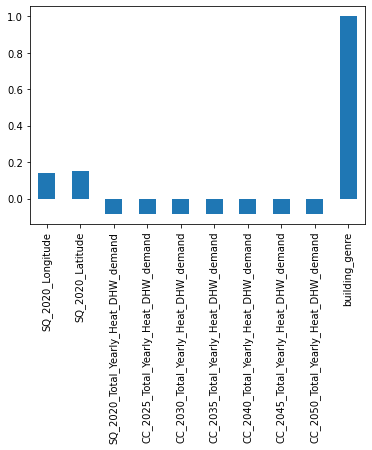

In [29]:
df.corrwith(df[target_feature]).plot.bar()

##### Trimming Outliers

In [30]:
def trim_and_cap_outliers(feature, df): 
    # Source: https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/
    #sns.boxplot(df[feature])
    
    print(f"Trimming and capping '{feature}'")
    
    # Finding the IQR
    percentile25 = df[feature].quantile(0.25)
    percentile75 = df[feature].quantile(0.75)
    iqr = percentile75-percentile25
    #  Finding upper and lower limit
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    # Finding Outliers
    df[df[feature] > upper_limit]
    df[df[feature] < lower_limit]
    # Trimming
    new_df = df[df[feature] < upper_limit]
    #print(new_df.shape)
    new_df.sample(5)
    
    # Compare the plots after trimming
    plt.figure(figsize=(16,8))
    plt.subplot(3,2,1)
    sns.histplot(x=df[feature])
    plt.subplot(3,2,2)
    sns.boxplot(x=df[feature])
    plt.subplot(3,2,3)
    sns.histplot(x=new_df[feature])
    plt.subplot(3,2,4)
    sns.boxplot(x=new_df[feature])
    plt.show()
    
    #Capping
    new_df_cap = df.copy()
    new_df_cap[feature] = np.where(
        new_df_cap[feature] > upper_limit,
        upper_limit,
        np.where(
            new_df_cap[feature] < lower_limit,
            lower_limit,
            new_df_cap[feature]
        )
    )
    
    #Compare the plots after capping
    plt.figure(figsize=(16,8))
    plt.subplot(3,2,5)
    sns.histplot(x=new_df_cap[feature])
    plt.subplot(3,2,6)
    sns.boxplot(x=new_df_cap[feature])
    plt.show()
    
    return new_df_cap
    # You can do capping now but we won't do it for now

In [31]:
def trim_and_cap_all_outliers(database):
    database_without_outliers = database.copy()
    for feature in database.columns:
        if feature not in categorical_features:
            if len(database[feature].value_counts())>=100: # Making sure that its not categorical
                if feature!="Mother's weight in week 28": # CHANGE
                    database_without_outliers = trim_and_cap_outliers(feature, database_without_outliers)
    return database_without_outliers

Trimming and capping 'SQ_2020_Longitude'


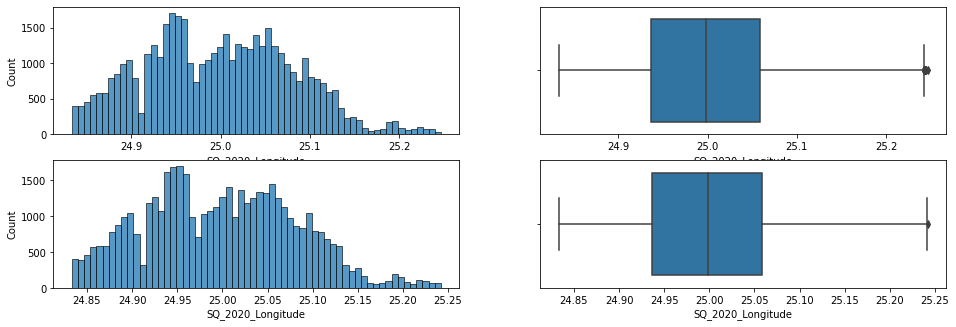

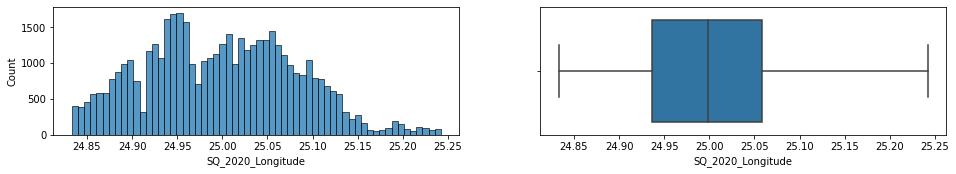

Trimming and capping 'SQ_2020_Latitude'


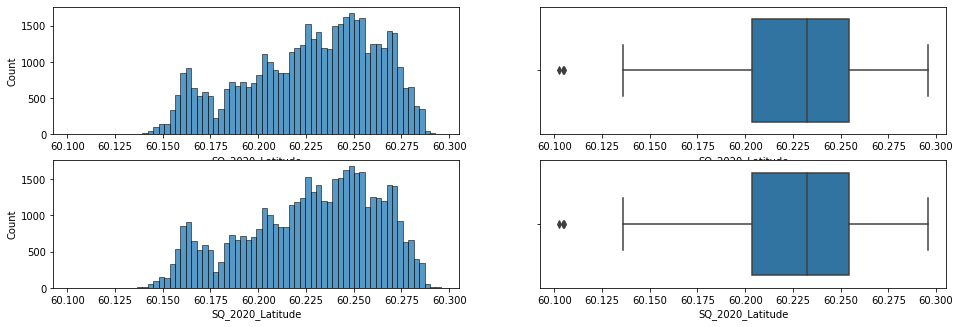

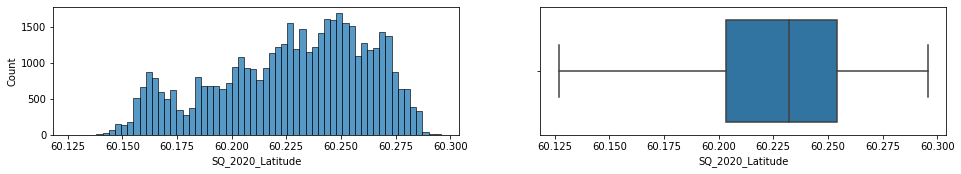

Trimming and capping 'SQ_2020_Total_Yearly_Heat_DHW_demand'


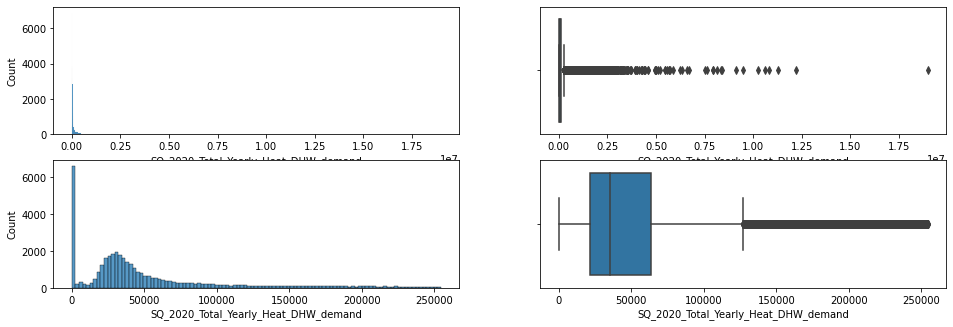

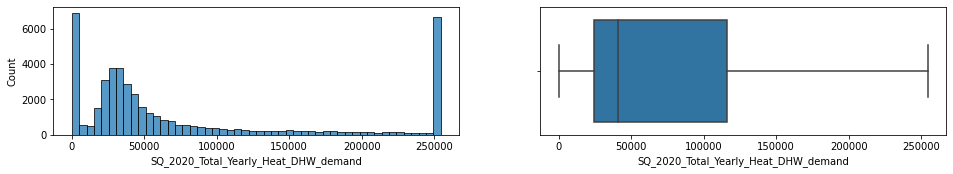

Trimming and capping 'SQ_2020_January_Heating_Demand'


TypeError: '<' not supported between instances of 'int' and 'str'

In [32]:
trim_and_cap_all_outliers(df)

In [34]:
df.describe()

,SQ_2020_Longitude,SQ_2020_Latitude,SQ_2020_Total_Yearly_Heat_DHW_demand,CC_2025_Total_Yearly_Heat_DHW_demand,CC_2030_Total_Yearly_Heat_DHW_demand,CC_2035_Total_Yearly_Heat_DHW_demand,CC_2040_Total_Yearly_Heat_DHW_demand,CC_2045_Total_Yearly_Heat_DHW_demand,CC_2050_Total_Yearly_Heat_DHW_demand,building_genre
count,45943.000000,45943.000000,4.594300e+04,4.594300e+04,4.594300e+04,4.594300e+04,4.594300e+04,4.594300e+04,4.594300e+04,45943.000000
mean,24.998376,60.227442,1.357683e+05,1.328893e+05,1.300439e+05,1.280141e+05,1.259945e+05,1.240093e+05,1.220278e+05,3.272142
std,0.083475,0.034571,3.434212e+05,3.355359e+05,3.277438e+05,3.222000e+05,3.166920e+05,3.112773e+05,3.059016e+05,0.976481
min,24.833270,60.102440,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,24.936780,60.203415,2.397950e+04,2.348150e+04,2.299000e+04,2.264200e+04,2.229650e+04,2.195550e+04,2.160800e+04,3.000000
50%,24.998110,60.232400,4.077100e+04,3.988800e+04,3.899400e+04,3.837100e+04,3.772100e+04,3.710600e+04,3.648500e+04,3.000000
75%,25.058925,60.254365,1.161725e+05,1.137570e+05,1.113870e+05,1.097675e+05,1.080750e+05,1.063985e+05,1.047140e+05,4.000000
max,25.246860,60.295680,1.896961e+07,1.849965e+07,1.803635e+07,1.770887e+07,1.738187e+07,1.706274e+07,1.674518e+07,6.000000


In [35]:
df[target_feature]

0        3
1        3
2        5
3        3
4        3
        ..
46636    3
46637    4
46638    3
46639    3
46640    5
Name: building_genre, Length: 45943, dtype: int64

### Removing correlated features

In [36]:
correlated_features = set()
correlation_matrix = df.drop(target_feature, axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
correlated_features

{'CC_2025_Total_Yearly_Heat_DHW_demand',
 'CC_2030_Total_Yearly_Heat_DHW_demand',
 'CC_2035_Total_Yearly_Heat_DHW_demand',
 'CC_2040_Total_Yearly_Heat_DHW_demand',
 'CC_2045_Total_Yearly_Heat_DHW_demand',
 'CC_2050_Total_Yearly_Heat_DHW_demand'}

As we can see, the yearly heat demand is consistent among all the years so just using 2020 should give us enough data.

In [37]:
df.sample(5)

,SQ_2020_Longitude,SQ_2020_Latitude,SQ_2020_Total_Yearly_Heat_DHW_demand,SQ_2020_January_Heating_Demand,SQ_2020_February_Heating_Demand,SQ_2020_March_Heating_Demand,SQ_2020_April_Heating_Demand,SQ_2020_May_Heating_Demand,SQ_2020_June_Heating_Demand,SQ_2020_July_Heating_Demand,SQ_2020_August_Heating_Demand,SQ_2020_September_Heating_Demand,SQ_2020_October_Heating_Demand,SQ_2020_November_Heating_Demand,SQ_2020_December_Heating_Demand,CC_2025_Total_Yearly_Heat_DHW_demand,CC_2025_January_Heating_Demand,CC_2025_February_Heating_Demand,CC_2025_March_Heating_Demand,CC_2025_April_Heating_Demand,CC_2025_May_Heating_Demand,CC_2025_June_Heating_Demand,CC_2025_July_Heating_Demand,CC_2025_August_Heating_Demand,CC_2025_September_Heating_Demand,CC_2025_October_Heating_Demand,CC_2025_November_Heating_Demand,CC_2025_December_Heating_Demand,CC_2030_Total_Yearly_Heat_DHW_demand,CC_2030_January_Heating_Demand,CC_2030_February_Heating_Demand,CC_2030_March_Heating_Demand,CC_2030_April_Heating_Demand,CC_2030_May_Heating_Demand,CC_2030_June_Heating_Demand,CC_2030_July_Heating_Demand,CC_2030_August_Heating_Demand,CC_2030_September_Heating_Demand,CC_2030_October_Heating_Demand,CC_2030_November_Heating_Demand,CC_2030_December_Heating_Demand,CC_2035_Total_Yearly_Heat_DHW_demand,CC_2035_January_Heating_Demand,CC_2035_February_Heating_Demand,CC_2035_March_Heating_Demand,CC_2035_April_Heating_Demand,CC_2035_May_Heating_Demand,CC_2035_June_Heating_Demand,CC_2035_July_Heating_Demand,CC_2035_August_Heating_Demand,CC_2035_September_Heating_Demand,CC_2035_October_Heating_Demand,CC_2035_November_Heating_Demand,CC_2035_December_Heating_Demand,CC_2040_Total_Yearly_Heat_DHW_demand,CC_2040_January_Heating_Demand,CC_2040_February_Heating_Demand,CC_2040_March_Heating_Demand,CC_2040_April_Heating_Demand,CC_2040_May_Heating_Demand,CC_2040_June_Heating_Demand,CC_2040_July_Heating_Demand,CC_2040_August_Heating_Demand,CC_2040_September_Heating_Demand,CC_2040_October_Heating_Demand,CC_2040_November_Heating_Demand,CC_2040_December_Heating_Demand,CC_2045_Total_Yearly_Heat_DHW_demand,CC_2045_January_Heating_Demand,CC_2045_February_Heating_Demand,CC_2045_March_Heating_Demand,CC_2045_April_Heating_Demand,CC_2045_May_Heating_Demand,CC_2045_June_Heating_Demand,CC_2045_July_Heating_Demand,CC_2045_August_Heating_Demand,CC_2045_September_Heating_Demand,CC_2045_October_Heating_Demand,CC_2045_November_Heating_Demand,CC_2045_December_Heating_Demand,CC_2050_Total_Yearly_Heat_DHW_demand,CC_2050_January_Heating_Demand,CC_2050_February_Heating_Demand,CC_2050_March_Heating_Demand,CC_2050_April_Heating_Demand,CC_2050_May_Heating_Demand,CC_2050_June_Heating_Demand,CC_2050_July_Heating_Demand,CC_2050_August_Heating_Demand,CC_2050_September_Heating_Demand,CC_2050_October_Heating_Demand,CC_2050_November_Heating_Demand,CC_2050_December_Heating_Demand,building_genre
15730,25.04142,60.16472,102698,14301,12369,10901,3932,537,59,2,27,1530,6711,10895,13148,100820,13981,12123,10672,3779,472,47,1,21,1399,6548,10654,12834,98964,13664,11890,10442,3606,415,37,1,16,1267,6390,10418,12531,97626,13440,11669,10283,3509,380,33,1,13,1181,6241,10268,12322,96296,13212,11456,10121,3402,348,28,0,10,1101,6093,10120,12118,94975,12995,11240,9964,3300,318,24,0,8,1022,5940,9968,11909,93688,12777,11032,9807,3212,290,21,0,6,948,5791,9818,11700,3
41925,24.90248,60.24051,28257,4567,3908,3371,1204,218,35,1,15,502,2135,3473,4197,27679,4463,3829,3302,1157,197,29,1,12,464,2085,3405,4105,27075,4359,3751,3228,1106,176,24,1,9,425,2032,3329,4004,26669,4295,3689,3179,1079,164,21,0,7,399,1985,3280,3938,26259,4224,3621,3130,1049,152,19,0,6,375,1939,3238,3876,25850,4152,3556,3088,1021,142,16,0,5,352,1889,3189,3811,25442,4080,3491,3038,992,131,14,0,4,330,1843,3140,3749,4
22457,24.96915,60.25653,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
43313,24.90315,60.24873,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### Golden Feature List

In [38]:
df[target_feature] = df[target_feature].astype("int64")
corr_with_target_feature = df.corr()[target_feature][:-1]
golden_features_list = corr_with_target_feature[abs(corr_with_target_feature) > 0.10].sort_values(ascending=False)
print("There is {} moderately correlated values with Child Weight:\n{}".format(len(golden_features_list), golden_features_list))

There is 2 moderately correlated values with Child Weight:
SQ_2020_Latitude     0.153288
SQ_2020_Longitude    0.139143
Name: building_genre, dtype: float64


#### Model Implementation

In [39]:
def drop(database, golden_features):
    temp = database.copy()
    for feature in database.columns:
        if feature not in golden_features and feature!=target_feature:
            temp.drop(feature, inplace=True, axis=1)
    return temp

In [40]:
df_cropped = drop(df,golden_features_list)

In [41]:
# This step is just to make the latter steps easier
df = df_cropped.copy()

In [42]:
from sklearn.model_selection import train_test_split # split train and test data
y_data = df[target_feature]
x_data = df.drop(target_feature, axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4, random_state=1)

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [44]:
from sklearn.linear_model import LogisticRegression

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_data.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x_data.columns)

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

#### Model Validation

In [45]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
#tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
cnf_matrix

array([[   0,    0,    1,    6,    0,    0,    0],
       [   0,    0,   20,  250,    0,    0,    0],
       [   0,    0,   91, 2766,    0,    0,    0],
       [   0,    0,  269, 9367,    0,    0,    0],
       [   0,    1,   36, 3393,    0,    0,    0],
       [   0,    0,   62, 1545,    0,    0,    0],
       [   0,    0,   23,  548,    0,    0,    0]])

In [47]:
def plot_confusion_matrix(cnf_matrix):
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

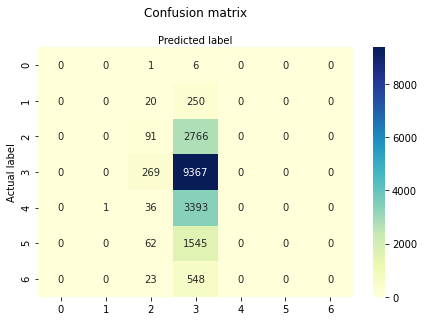

In [48]:
plot_confusion_matrix(cnf_matrix)

In [51]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5146370660572424


We have six category in our feature so its getting cumbersome.

Note: As our target features and golden features have a very realistic correlation, the model building part becomes  easy. Later on, we will select other scenarios and target features to get some more amazing insights about the data.